Output()

Output()

Output()

Output()

Output()

Output()

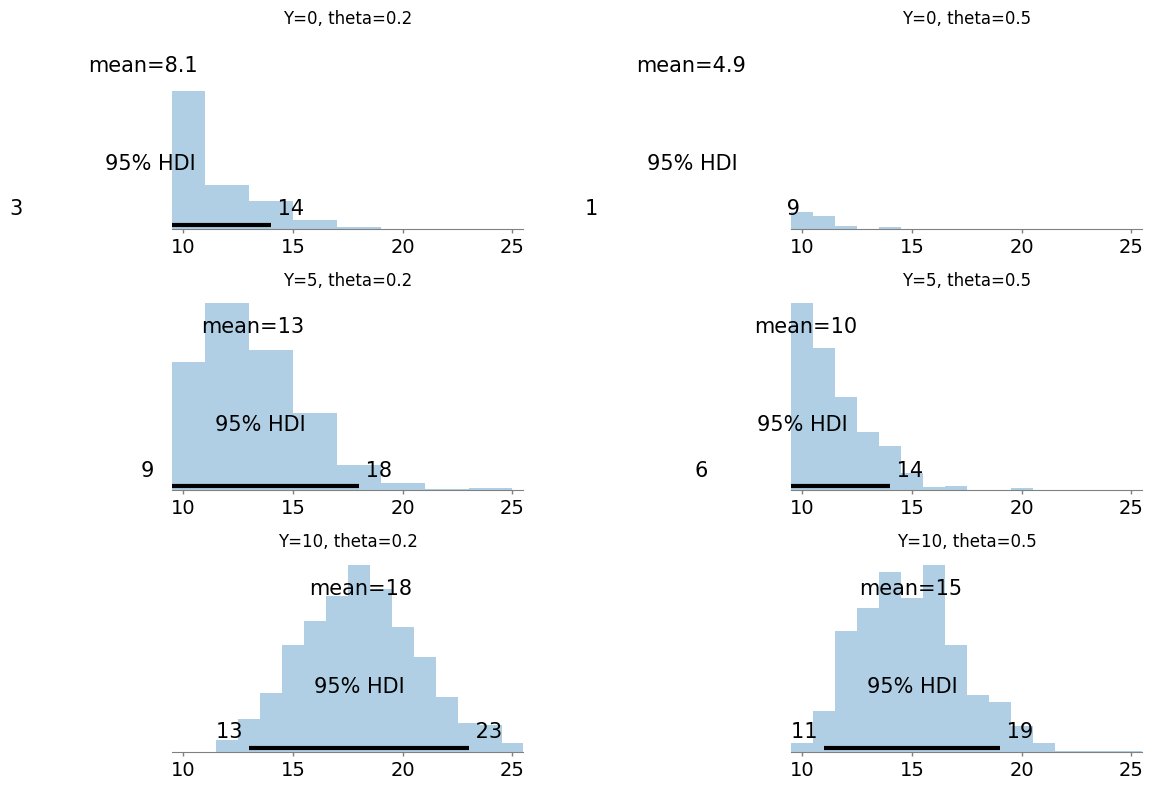

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

#parametrii
theta_values = [0.2, 0.5]
Y_values = [0, 5, 10]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8), sharex=True)

for i, Y_obs in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            #prior pentru n
            n = pm.Poisson("n", mu=10)

            #verosimilitate
            Y = pm.Binomial("Y", n=n, p=theta, observed=Y_obs)

            #mostreaza posteriorul
            trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=2)

        #plot posterior (Y, theta)
        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j], hdi_prob=0.95)
        axes[i, j].set_title(f"Y={Y_obs}, theta={theta}")

#ajustare layout
plt.tight_layout()
plt.show()
